# Modelos de Regresión lineal
## Modelo con datos simulados
y = a+b*x
X: 100 valores distribuidos según N(1.5, 2.5)
Ye = 5 + 1.9 * X+e
e estará distribuida según una normal N(0, 0.8)


In [2]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5*np.random.randn(100)
res = 0.8*np.random.randn(100)
y_pred = 5+1.9*x
y_act = 5+1.9*x+res

In [4]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [5]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediction": y_pred_list
    }
)

In [6]:
data.head()

,x,y_actual,y_prediction
0,3.917267,13.687124,12.442807
1,2.555729,8.829047,9.855885
2,3.431841,11.745459,11.520498
3,2.517439,9.555046,9.783134
4,1.972922,8.441431,8.748552


In [7]:
import matplotlib.pyplot as plt

In [8]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs predicción')

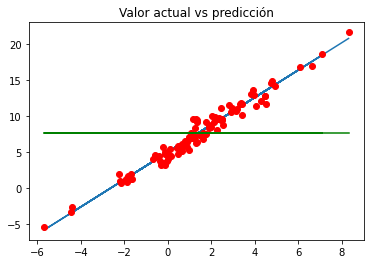

In [9]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g-")
plt.title("Valor actual vs predicción")


## Cómo es la predicción de buena?
* SST = SSD + SSR
* SST: Variabilidad de los datos con respecto de su media
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR: Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR/SST, coeficiente de determinación entre 0 y 1

In [10]:
data["SSR"] = (data["y_prediction"]-np.mean(y_act))**2
data["SSD"] = (data["y_actual"]-data["y_prediction"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [11]:
data.head()

,x,y_actual,y_prediction,SSR,SSD,SST
0,3.917267,13.687124,12.442807,23.195204,1.548325,36.729142
1,2.555729,8.829047,9.855885,4.969410,1.054397,1.445716
2,3.431841,11.745459,11.520498,15.161918,0.050608,16.964449
3,2.517439,9.555046,9.783134,4.650350,0.052024,3.718644
4,1.972922,8.441431,8.748552,1.258626,0.094324,0.663839


In [12]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [13]:
SSR

1937.6656518159589

In [14]:
SSD

68.49722700409077

In [15]:
SST

2005.8234745344312

In [16]:
SSR+SSD

2006.1628788200496

In [17]:
R2 = SSR/SST
R2

0.9660200293875351

(array([ 3.,  9., 11., 23., 21., 15.,  9.,  5.,  1.,  3.]),
 array([-1.88228964, -1.45565832, -1.02902699, -0.60239567, -0.17576434,
         0.25086698,  0.67749831,  1.10412963,  1.53076096,  1.95739228,
         2.38402361]),
 <BarContainer object of 10 artists>)

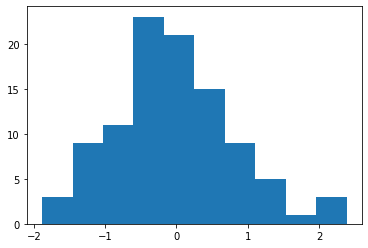

In [18]:
plt.hist((data["y_actual"]-data["y_prediction"]))

## Obteniendo la recta de regresión
* y = a+b*x
* b = sum((xi-xm)*(yi-ym))/sum((xi-xm)^2)
* a = ym-b*xm

In [19]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean 

(1.4042652789725336, 7.626667242508285)

In [20]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [21]:
beta = sum(data["beta_n"])/sum(data["beta_d"])
alpha = y_mean - beta*x_mean

In [22]:
alpha, beta

(4.958560460217054, 1.9000019599170173)

El modelo lineal obtenido por regresión es:
y = 4.961882654854124 + 1.9429129051719651*x

In [23]:
data["y_model"] = alpha + beta*data["x"]

In [24]:
data.head()

,x,y_actual,y_prediction,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.917267,13.687124,12.442807,23.195204,1.548325,36.729142,15.229939,6.315177,12.401375
1,2.555729,8.829047,9.855885,4.969410,1.054397,1.445716,1.384496,1.325868,9.814450
2,3.431841,11.745459,11.520498,15.161918,0.050608,16.964449,8.351163,4.111063,11.479065
3,2.517439,9.555046,9.783134,4.650350,0.052024,3.718644,2.146621,1.239156,9.741700
4,1.972922,8.441431,8.748552,1.258626,0.094324,0.663839,0.463321,0.323371,8.707117


In [25]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [26]:
SSR, SSD, SST

(1937.497948268562, 68.32552626586956, 2005.8234745344312)

In [27]:
R2=SSR/SST
R2

0.9659364210593216

Text(0.5, 1.0, 'Valor actual vs predicción')

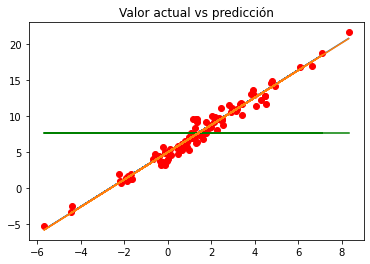

In [28]:
%matplotlib inline

y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]
plt.plot(x, y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g-")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs predicción")

## Error estándar de los residuos (RSE)

In [31]:
RSE = np.sqrt(SSD/(len(data)-2)) # cuanto menor sea, mejor
RSE

0.8349845792653382

In [32]:
np.mean(data["y_actual"])

7.626667242508285

In [33]:
RSE/np.mean(data["y_actual"]) #porcentaje del error

0.10948223551847604